# Nuclear Instrumentation
## ΔE-E Detector

Karina Chiñas Fuentes

Student Nummer: 02118434

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as spc
import pylab as pl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

qe = spc.elementary_charge # C
mp = spc.proton_mass       # kg
me = spc.electron_mass     # kg
ε0 = spc.epsilon_0         # F/m
c  = spc.speed_of_light    # m/s

**Task:** calcuate the energy loss of a given particle in a $\Delta$E-E detector, using the Bethe-Bloch formula: 

\begin{equation}
    S_m(\beta) = S_{m,0}\frac{Z_x}{A_x}\left( \frac{Z^2_a}{\beta} \right)\left[ Ln\left( \frac{2m_ec^2\beta^2}{<I>}\right) -Ln\left( 1-\beta^2 \right) -\beta^2 \right]
\end{equation}

which express the stopping power in MeV$\cdot$cm$^2\cdot$g$^{-1}$. Where

$$
    S_{m,0} = 4\pi r_e^2 N_A m_e^2 c^2 \approx 0.307 \: \text{MeV}\cdot\text{cm}^2\cdot\text{g}^{-1}
$$

if $A_x$, molar mass of the target nucleus, is expressed in g$\cdot$mol$^{-1}$; with the approximation that, for all elements, $Z_x/A_x\sim$ 0.5. Furthermore, $r_e$ is the classical electron radius

$$
    r_e = \frac{e^2}{4\pi\epsilon_0 m_ec^2} 
$$

And, $m_e$ is the electron mass, $e$ the electron charge, $Z_x$ the atomic number of the absorber atoms, $Z_a$ is the atomic number of the incoming particle, $n_x$ is the number density of the absorber atoms, $\beta = \nu/c$, $\nu$ is the speed of the incoming particle, and $I$ is the average excitation or ionization potential of the absorber atoms. Finally, recall that

$$
    \nu^2 = \frac{2E}{m} \:\: \rightarrow \:\: \beta^2 = \frac{2E}{m_A \cdot 931 \frac{\text{MeV}}{\text{amu}}}
$$

With $m_A$ beng the particle mass in atomic mass units, and $E$ the particle energy in MeV.

**Detector:**  The E detector is made of Ge with energy threshold of 5.2 MeV and thichkness of 11 mm. The $\Delta$E transmission detector is made of Si and its characteristics are _to be determined_ with the knowledge that **deuterons** need to have at least 13.3 MeV to be detected in the $\Delta$E-E detector. And, **protons** cannot be detected with energy above 60 MeV.

**Data:**

* **Silicon**
    * Ionisation potentials: 173 eV
    * Density: 2.32 g/cm$^3$
    * A: 28.0855 g/mol
    * Z: 14
    
* **Germanium**
    * Ionisation potentials: 350 eV
    * Density: 5.3 g/cm$^3$
    * A: 72.59 g/mol
    * Z: 32    

In [2]:
Sm0= 0.307e6                    # ev*cm2/g 
Si = {
    "ionization_potential":173, # eV
    "density":2.32,             # g/cm3
    "A":28.0855,                # atomic mass [g/mol]
    "Z":14,                     # atomic number
    "width": None,              # to be determined
    "I": None,                  # to be determined
}
Ge = {
    "ionization_potential":350, # eV
    "density":5.3,              # g/cm3
    "A":72.59,                  # atomic mass [g/mol]
    "Z":32,                     # atomic number
    "width": 1.1,               # cm
    "I": 5.2e6,                 # energy threshold [eV]
}

\begin{equation}
    S_m(E) = S_{m,0}\frac{Z_xZ^2_a}{A_x}\sqrt{\frac{m_\alpha c^2}{2E}}\left[ Ln\left( \frac{4m_e}{Im_\alpha}E\right) -Ln\left( 1-\frac{2E}{m_\alpha c^2}\right) -\frac{2E}{m_\alpha c^2} \right]
\end{equation}


In [28]:
def BB_formula(n,Za,E,Zx,Ax,I):
    """
    n : number of neutrons: 0-proton, 1-deuterons, 2-tritons
    Za: atomic number of incoming particle
    E : energy of incoming particle in MeV
    Zx: atomic number of the absorber atoms
    Ax: molar mass of the target nucleus
    I:  ionization potential of the absorber atoms
    """
    n += 1
    mα   = n*mp               # mass of incoming particle in kg
    mecc = (me*c*c/qe)*1e-6   # electron rest mass in MeV
    mαcc = n*(mp*c*c/qe)*1e-6 # incoming particle's rest mass in MeV

    S = (Sm0*Zx*Za*Za/Ax)*np.sqrt(mαcc/(2*E))*( np.log( (4*me/(I*mα))*E ) -np.log(1-(2/mαcc)*E) -(2/mαcc)*E)
    
    return S

The incoming particles are: **protons**, **deutrons** and **tritons**

Numerical analysis

In [29]:
d = 1.1  # detector width
N = 10   # grid partition
Δx = d/N

In [34]:
E  = np.linspace(0.1,2,200)  # Initial Energies in MeV
S  = np.zeros(len(E))
ΔE = E.copy()

N_neutrons = 0

if N_neutrons == 0:
    for j, Eo in enumerate(E):
        for i in range(N):
            S[j] = BB_formula(N_neutrons, 1, Eo, Ge["Z"], Ge["A"], Ge["I"])
            # if energy is lower than 100 KeV, then it can be cosidered to be stopped, for protons
            if (ΔE[j]-S[j]*Δx < 0.1): 
                break
            else:
                ΔE[j] -= S[j]*Δx
else:
    for j, Eo in enumerate(E):
        for i in range(N):
            S[j] = BB_formula(N_neutrons, 1, Eo, Ge["Z"], Ge["A"], Ge["I"]) 
            # if energy is lower or eq to 0, then it can be cosidered to be stopped
            if (ΔE[j]-S[j]*Δx <= 0): 
                break            
            else:
                ΔE[j] -= S[j]*Δx 

In [35]:
ΔE

array([2.43655832e+08, 2.31907396e+08, 2.21636572e+08, 2.12559943e+08,
       2.04464554e+08, 1.97186915e+08, 1.90599168e+08, 1.84599708e+08,
       1.79106642e+08, 1.74053144e+08, 1.69384071e+08, 1.65053469e+08,
       1.61022696e+08, 1.57258995e+08, 1.53734389e+08, 1.50424827e+08,
       1.47309500e+08, 1.44370301e+08, 1.41591395e+08, 1.38958861e+08,
       1.36460409e+08, 1.34085139e+08, 1.31823350e+08, 1.29666372e+08,
       1.27606432e+08, 1.25636537e+08, 1.23750377e+08, 1.21942243e+08,
       1.20206952e+08, 1.18539791e+08, 1.16936459e+08, 1.15393025e+08,
       1.13905889e+08, 1.12471744e+08, 1.11087547e+08, 1.09750495e+08,
       1.08457997e+08, 1.07207660e+08, 1.05997262e+08, 1.04824743e+08,
       1.03688190e+08, 1.02585818e+08, 1.01515966e+08, 1.00477082e+08,
       9.94677169e+07, 9.84865123e+07, 9.75321967e+07, 9.66035768e+07,
       9.56995319e+07, 9.48190082e+07, 9.39610139e+07, 9.31246145e+07,
       9.23089285e+07, 9.15131240e+07, 9.07364148e+07, 8.99780573e+07,
      

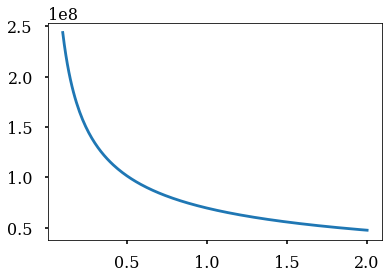

In [31]:
plt.plot(E,ΔE);

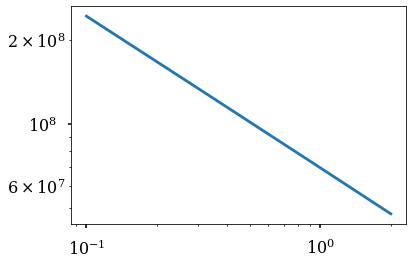

In [32]:
plt.loglog(E,ΔE)